<img src='img/logo.png' width=200>
<center>
    <br/>
    Otkrivanje zakonitosti u podacima 2020-2021
    <br/>
    Fakultet Organizacionih Nauka, 2021
    <br/>
    <h1>Projektni zadatak</h1>
</center>

## Zahtevi projektnog zadatka
- Opis i razumevanje problema - 4 poena
- Opis i razumevanje podataka - 4 poena
- Priprema podataka - 7 poena
- Podešavanje parametara algoritma i selekcija/otežavanje atributa - 7 poena
- Poređenje performansi algoritma - 6 poena
- Evaluacija rešenja - 6 poena
- Primena modela - 3 poena
- Zaključak i budući pravci - 3 poena

In [19]:
# Ucitavanje standardnih biblioteka

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import datetime as dt
from matplotlib import pyplot as plt
%matplotlib inline

## Train

In [20]:
# Ucitavanje training data set-a

train_data = pd.read_csv('data/train.csv')

In [21]:
# Prikaz training data set-a

train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [22]:
# Provera da li postoje nedostajuce vrednosti u training data set-u

train_data.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [23]:
# Informacije o podacima

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [24]:
# Atribut Date je tipa object zbog toga su neophodne modifikacije ovog atributa
# Pretvaranje u datetime tip podataka, a zatim kreiranje novih kolona koje oznacavaju dan, mesec i godinu

train_data['Date'] = pd.to_datetime(train_data['Date'])

train_data['Day'] = train_data['Date'].dt.day
train_data['Month'] = train_data['Date'].dt.month
train_data['Year'] = train_data['Date'].dt.year

In [25]:
train_data.drop(['Date'], axis=1, inplace=True)

In [26]:
# Atribut StateHoliday je tipa object pa je potrebno proveriti njegove moguce vrednosti i svesti ih na jedinstvene

train_data['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [27]:
train_data['StateHoliday'] = train_data['StateHoliday'].apply(lambda x:'0' if x == 0 or x == '0' else x)

In [28]:
train_data['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

## Razumevanje podataka - Vizualizacije

<AxesSubplot:xlabel='StateHoliday', ylabel='count'>

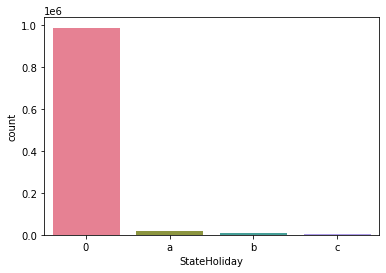

In [29]:
# Prikaz broja opservacija za moguce kategorije atributa StateHoliday 

sns.countplot(train_data['StateHoliday'], palette="husl")

<AxesSubplot:xlabel='StateHoliday', ylabel='Sales'>

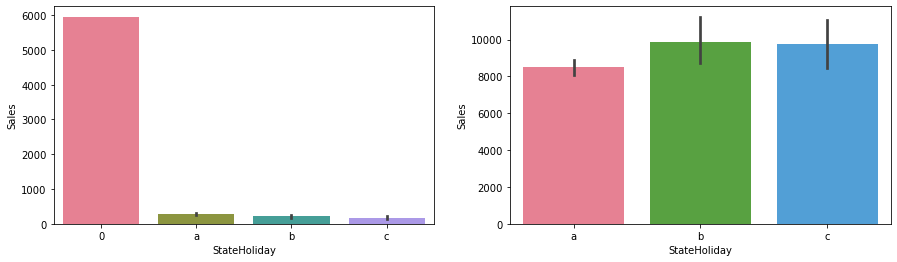

In [30]:
# Prikaz prosecnog Sales-a po mogucim kategorijama StateHoliday

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

# Prikaz prosecnog Sales-a po svim mogucim kategorijama StateHoliday
sns.barplot(x='StateHoliday', y='Sales', data=train_data, ax=axis1, palette="husl")

# Prikaz pozitivnih vrednosti prosecnog Sales-a kada je StateHoliday a, b i c to jest kada je praznik 
sns.barplot(x='StateHoliday', y='Sales', data=train_data[(train_data["StateHoliday"] != "0") & (train_data["Sales"] > 0)], ax=axis2, palette="husl")

<AxesSubplot:xlabel='SchoolHoliday', ylabel='count'>

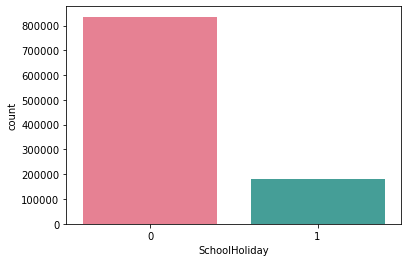

In [13]:
# Prikaz broja opservacija za moguce kategorije atributa SchoolHoliday 

sns.countplot(train_data['SchoolHoliday'], palette="husl")

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Sales'>

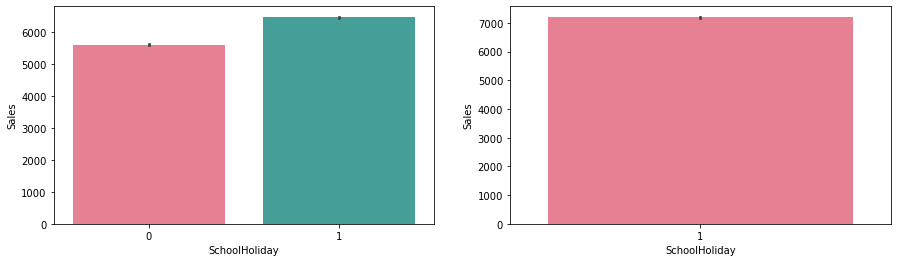

In [14]:
# Prikaz prosecnog Sales-a po mogucim kategorijama SchoolHoliday

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

# Prikaz prosecnog Sales-a po svim mogucim kategorijama SchoolHoliday
sns.barplot(x='SchoolHoliday', y='Sales', data=train_data, ax=axis1, palette="husl")

# Prikaz pozitivnih vrednosti prosecnog Sales-a kada je SchoolHoliday 1 to jest kada je skolski praznik = kada skole nisu radile
sns.barplot(x='SchoolHoliday', y='Sales', data=train_data[(train_data["SchoolHoliday"] != 0) & (train_data["Sales"] > 0)], ax=axis2, palette="husl")

<AxesSubplot:xlabel='Open', ylabel='count'>

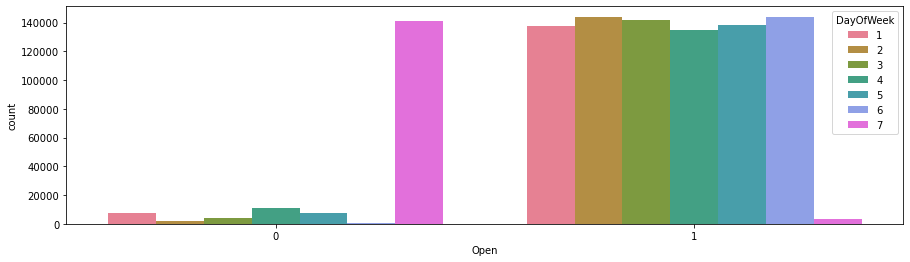

In [15]:
# Prikaz broja opservacija u zavisnosti od toga da li je prodavnica otvorena ili zatvorena po danima u nedelji

fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=train_data, ax=axis1, palette="husl")

<AxesSubplot:xlabel='Year', ylabel='Customers'>

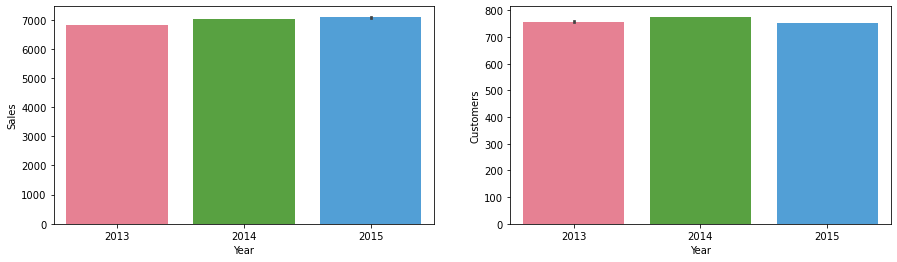

In [16]:
# Prikaz prosecne vrednosti Sales-a po godinama u slucaju kada je prodavnica otvorena i kada je bilo prodaje
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='Year', y='Sales', data=train_data[(train_data["Open"] != 0) & (train_data["Sales"] > 0)], ax=axis1, palette="husl")

# Prikaz prosecnog broja Customers-a po godinama u slucaju kada je prodavnica otvorena i kada je bilo prodaje
sns.barplot(x='Year', y='Customers', data=train_data[(train_data["Open"] != 0) & (train_data["Sales"] > 0)], ax=axis2, palette="husl")

<AxesSubplot:xlabel='DayOfWeek', ylabel='Customers'>

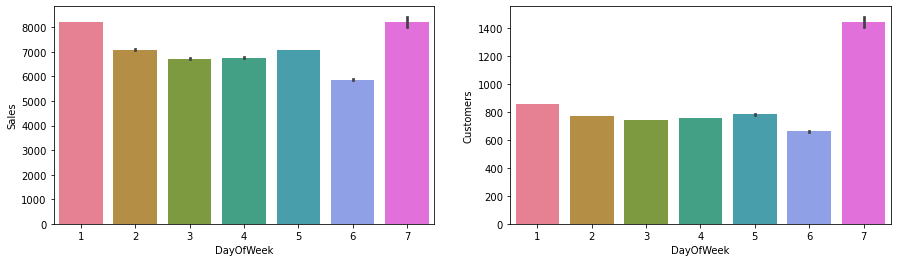

In [17]:
# Prikaz prosecne vrednosti Sales-a po danima u nedelji
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='DayOfWeek', y='Sales', data=train_data[(train_data["Open"] != 0) & (train_data["Sales"] > 0)], order=[1,2,3,4,5,6,7], ax=axis1, palette="husl")

# Prikaz prosecne vrednosti Customers-a po danima u nedelji
sns.barplot(x='DayOfWeek', y='Customers', data=train_data[(train_data["Open"] != 0) & (train_data["Sales"] > 0)],order=[1,2,3,4,5,6,7], ax=axis2, palette="husl")

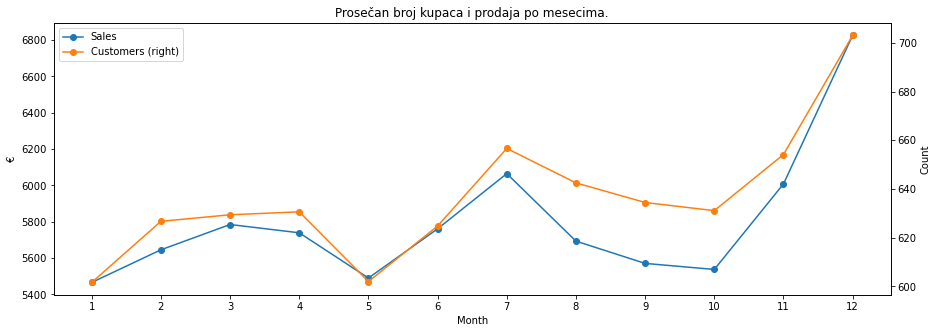

In [18]:
# Prosečan broj kupaca i prodaja po mesecima

ax = train_data.groupby('Month')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(15,5), marker='o')
ax.set_ylabel('€')
ax.right_ax.set_ylabel('Count')
ax.set_xticks(range(1,13))
plt.title('Prosečan broj kupaca i prodaja po mesecima.');

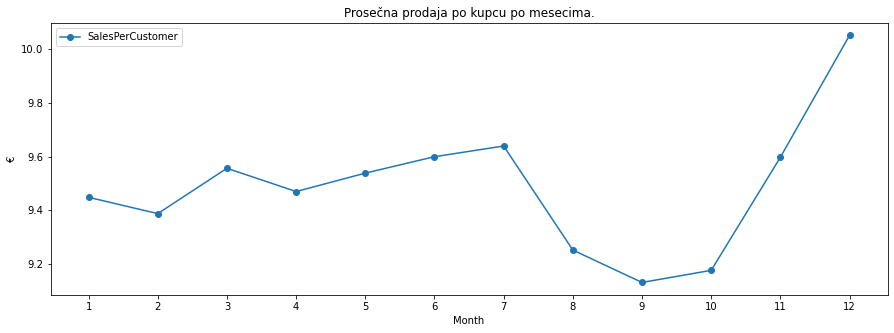

In [19]:
# Prosecna prodaja po kupcu po mesecima.

train_data_graf=train_data
train_data_graf['SalesPerCustomer'] = train_data_graf.Sales / train_data_graf.Customers
ax = train_data_graf.groupby('Month')[['SalesPerCustomer']].mean().plot(figsize=(15,5), marker='o')
ax.set_ylabel('€')
ax.set_xticks(range(1,13))
plt.title('Prosečna prodaja po kupcu po mesecima.');

## Store

In [31]:
# Ucitavanje podataka o prodavnicama

store_data = pd.read_csv('data/store.csv')

In [32]:
# Prikaz podataka o prodavnicama

store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [33]:
# Informacije o podacima

store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


## Razumevanje podataka - Vizualizacije

<AxesSubplot:xlabel='StoreType', ylabel='count'>

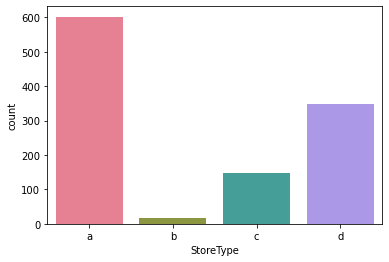

In [23]:
# Prikaz broja opservacija za moguce kategorije atributa StoreType 

sns.countplot(x='StoreType', data=store_data, order=['a','b','c', 'd'], palette="husl")

<AxesSubplot:xlabel='Assortment', ylabel='count'>

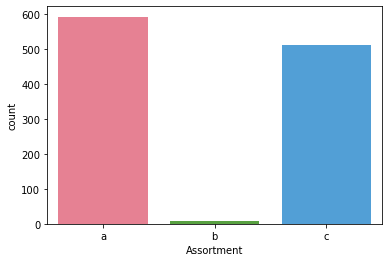

In [24]:
# Prikaz broja opservacija za moguce kategorije atributa Assortment 

sns.countplot(x='Assortment', data=store_data, order=['a','b','c'], palette="husl")

In [25]:
average_sales_customers = train_data.groupby('Store')[["Sales", "Customers"]].mean().reset_index()
df_sales_customers = pd.DataFrame({'Store':average_sales_customers.index,
                      'AvgSales':average_sales_customers["Sales"], 'AvgCustomers': average_sales_customers["Customers"]}, 
                      columns=['Store', 'AvgSales', 'AvgCustomers'])
df_store_avg_sales_cust = pd.merge(df_sales_customers, store_data, on='Store')
df_store_avg_sales_cust.head()

,Store,AvgSales,AvgCustomers,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4122.991507,486.045648,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5741.253715,620.286624,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,8021.769639,1100.057325,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,3867.110403,444.360934,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,4562.375796,525.990446,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


[Text(0.5, 0, 'Store Type'), Text(0, 0.5, 'Average No. of Customers')]

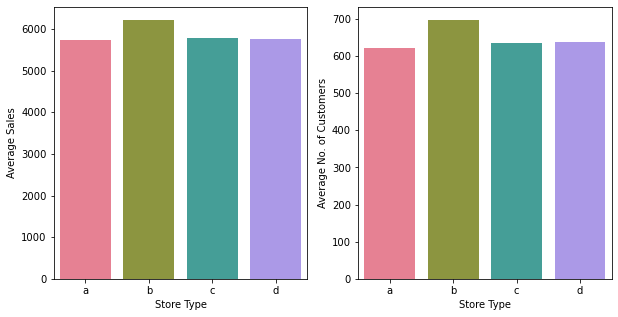

In [26]:
# Prikaz prosecnog Sales-a i prosecnog broja Customers-a po StoreType-u

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 5))
ax1 = sns.barplot(x="StoreType", y="AvgSales", data=df_store_avg_sales_cust, order=["a", "b", "c", "d"], ax=axis1, ci=None, palette="husl")
ax2 = sns.barplot(x="StoreType", y="AvgCustomers", data=df_store_avg_sales_cust, order=["a", "b", "c", "d"], ax=axis2, ci=None, palette="husl")
ax1.set(xlabel="Store Type", ylabel="Average Sales")
ax2.set(xlabel="Store Type", ylabel="Average No. of Customers")

[Text(0, 0.5, 'No. of Stores')]

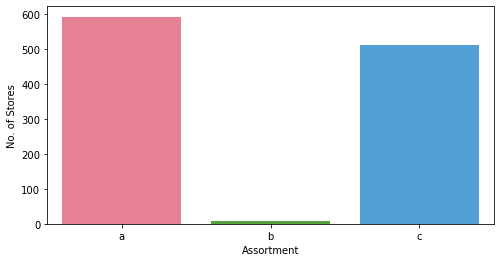

In [27]:
# Prikaz broja prodavnica po mogucim vrednostima Assortment-a

fig, (axis1) = plt.subplots(1, 1, figsize=(8, 4))
ax = sns.countplot(x="Assortment", data=df_store_avg_sales_cust, order=["a", "b", "c"], palette="husl")
ax.set(ylabel="No. of Stores")

[Text(0, 0.5, 'No. of Stores')]

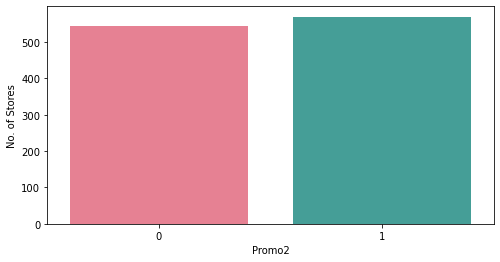

In [28]:
# Prikaz broja prodavnica u zavisnosti od toga da li ucestvuju u Promo2

fig, (axis1) = plt.subplots(1, 1, figsize=(8,4))
ax = sns.countplot(x="Promo2", data=df_store_avg_sales_cust, palette="husl")
ax.set(ylabel="No. of Stores")

In [173]:
# Provera da li postoje nedostajuce vrednosti u store data set-u

store_data.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<AxesSubplot:>

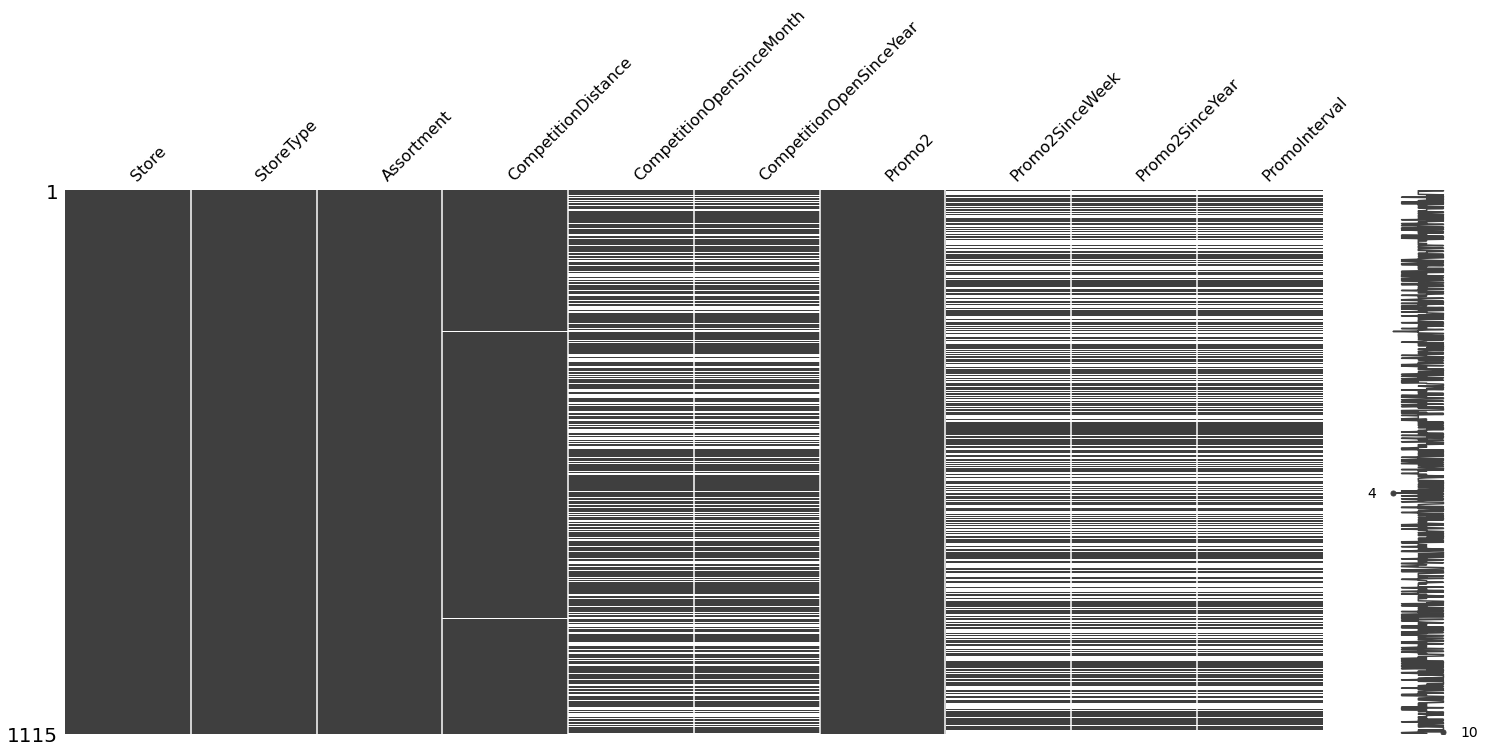

In [174]:
# Vizualizacija nedostajucih vrednosti

!pip install missingno
import missingno as msno
msno.matrix(store_data)

<AxesSubplot:>

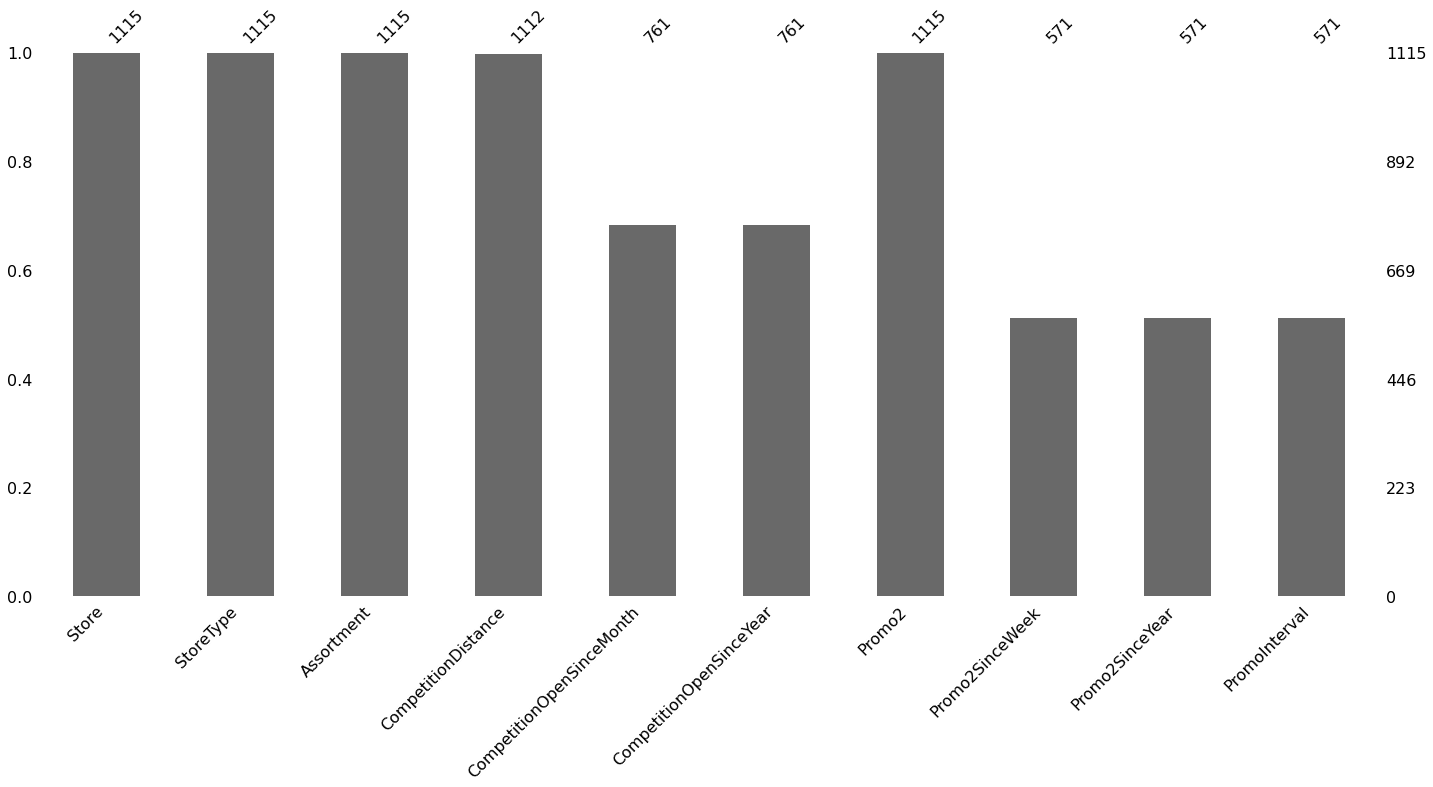

In [31]:
msno.bar(store_data)

In [34]:
# Popunjavanje nedostajucih vrednosti
# Vrednosti koje nedostaju atributu CompetitionDistance su popunjene srednjom vrednoscu tog atributa buduci da postoje
# samo tri nedostajuce vrednosti pa ovakav nacin popunjavanja istih nece uticati na rezultate.

store_data['CompetitionDistance'] = store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].mean())

In [35]:
# Nedostajuce vrednosti atributa Promo2SinceWeek, Promo2SinceYear i PromoInterval su popunjene 0 buduci da opservacije koje ih 
# sadrze imaju vrednost atributa Promo2 jednaku 0.

store_data[pd.isnull(store_data['PromoInterval']) & (store_data['Promo2']== 0)].describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,544.000000,544.000000,396.000000,396.000000,544.0,0.0,0.0
mean,555.531250,6545.312136,7.260101,2009.123737,0.0,NaN,NaN
std,317.491536,9357.298227,3.176739,4.326819,0.0,NaN,NaN
min,1.000000,30.000000,1.000000,1990.000000,0.0,NaN,NaN
25%,280.250000,997.500000,4.000000,2006.000000,0.0,NaN,NaN
50%,559.000000,2640.000000,8.000000,2010.000000,0.0,NaN,NaN
75%,827.250000,8095.000000,10.000000,2013.000000,0.0,NaN,NaN
max,1114.000000,75860.000000,12.000000,2015.000000,0.0,NaN,NaN


In [36]:
store_data['Promo2SinceWeek'] = store_data['Promo2SinceWeek'].fillna(0)
store_data['Promo2SinceYear'] = store_data['Promo2SinceYear'].fillna(0)
store_data['PromoInterval'] = store_data['PromoInterval'].fillna('0')

In [178]:
from sklearn.impute import KNNImputer

In [179]:
# Popunjavanje nedostajucih vrednosti na osnovu KNN principa
# Prvo se pronalazi zadati broj "suseda" to jest uzoraka koji su slicni po svim atributima sa onim uzorkom
# gde postoji nedostajuca vrednost. Zatim se racuna prosecna vrednost susednih uzoraka i ona se upisuje 
# u trenutnu nedostajucu vrednost.
# Proces se ponavlja dok se sve nedostajuce vrednosti ne popune.

imputer = KNNImputer(n_neighbors = 3, weights = 'uniform')

In [180]:
store_data_num = store_data[['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear']]

In [181]:
# Sa metodom fit se uci model, ali se metodom transform podaci transofrmisu. 
# Kada se zeli primeniti istovremeno i ucenje i primena postoji funkcija fit_transform.

store_data_num_t = imputer.fit_transform(store_data_num)

In [182]:
store_data_num_t = pd.DataFrame(store_data_num_t, index = store_data_num.index , columns = store_data_num.columns)

In [183]:
store_data_num_t.describe()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,5404.901079,7.242152,2008.687892,0.512108,12.083408,1030.239462
std,7652.849306,2.828666,5.341411,0.500078,15.542241,1006.038782
min,20.000000,1.000000,1900.000000,0.000000,0.000000,0.000000
25%,720.000000,5.000000,2006.333333,0.000000,0.000000,0.000000
50%,2330.000000,7.333333,2009.000000,1.000000,1.000000,2009.000000
75%,6875.000000,9.000000,2012.000000,1.000000,22.000000,2012.000000
max,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [184]:
store_data_num_t.isna().sum()

CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
dtype: int64

In [185]:
store_data['CompetitionOpenSinceYear'] = store_data_num_t['CompetitionOpenSinceYear']
store_data['CompetitionOpenSinceMonth'] = store_data_num_t['CompetitionOpenSinceMonth']

## Test

In [37]:
# Ucitavanje test data set-a

test_data = pd.read_csv('data/test.csv')

In [38]:
# Prikaz test data set-a

test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [39]:
# Informacije o podacima

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [40]:
# Modifikacija atributa Date

test_data['Date'] = pd.to_datetime(test_data['Date'])

test_data['Day'] = test_data['Date'].dt.day
test_data['Month'] = test_data['Date'].dt.month
test_data['Year'] = test_data['Date'].dt.year

In [41]:
test_data.drop(['Date'], axis=1, inplace=True)

In [42]:
test_data['StateHoliday'].value_counts()

0    40908
a      180
Name: StateHoliday, dtype: int64

In [43]:
# Provera da li postoje nedostajuce vrednosti

test_data.isna().sum()

Id                0
Store             0
DayOfWeek         0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
Day               0
Month             0
Year              0
dtype: int64

In [44]:
# Medijana atributa Open

test_data['Open'].median()

1.0

In [45]:
# Popunjavanje nedostajucih vrednosti atributa Open medijanom = 1 = prodavnica je u vecem broju slucajeva bila otvorena

test_data['Open'] = test_data['Open'].fillna(1)

## Spajanje podataka

In [46]:
# Spajanje train data set-a sa podacima o prodavnicama

df_train_store = train_data.merge(store_data, left_on='Store', right_on='Store', how = 'left')

In [47]:
df_train_store.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,31,7,2015,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,6064,625,1,1,0,1,31,7,2015,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,1,0,1,31,7,2015,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,1,0,1,31,7,2015,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,4822,559,1,1,0,1,31,7,2015,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [48]:
# Prikaz informacija o tipovima podataka

df_train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   Day                        1017209 non-null  int64  
 9   Month                      1017209 non-null  int64  
 10  Year                       1017209 non-null  int64  
 11  StoreType                  1017209 non-null  object 
 12  Assortment                 1017209 non-null  object 
 13  CompetitionD

In [49]:
# Spajanje test data set-a sa podacima o prodavnicama

df_test_store = test_data.merge(store_data, left_on='Store', right_on='Store', how = 'left')

In [50]:
df_test_store.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,1.0,1,0,0,17,9,2015,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,3,4,1.0,1,0,0,17,9,2015,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,1.0,1,0,0,17,9,2015,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0
3,4,8,4,1.0,1,0,0,17,9,2015,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0
4,5,9,4,1.0,1,0,0,17,9,2015,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0


In [51]:
# Prikaz informacija o tipovima podataka

df_test_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Open                       41088 non-null  float64
 4   Promo                      41088 non-null  int64  
 5   StateHoliday               41088 non-null  object 
 6   SchoolHoliday              41088 non-null  int64  
 7   Day                        41088 non-null  int64  
 8   Month                      41088 non-null  int64  
 9   Year                       41088 non-null  int64  
 10  StoreType                  41088 non-null  object 
 11  Assortment                 41088 non-null  object 
 12  CompetitionDistance        41088 non-null  float64
 13  CompetitionOpenSinceMonth  25872 non-null  flo

#### Nece biti razmatrani slucajevi kada prodavnica nije radila Open = 0 i kada nije bilo prodaje Sales = 0. Zbog toga potrebno je ukloniti te slucajeve.

In [52]:
df_train_store = df_train_store[(df_train_store["Open"] != 0) & (df_train_store['Sales'] > 0)]

In [53]:
# Izbacivanje kolone Open

df_train_store = df_train_store.drop(["Open"], axis = 1)
df_test_store = df_test_store.drop(["Open"], axis = 1)

<AxesSubplot:>

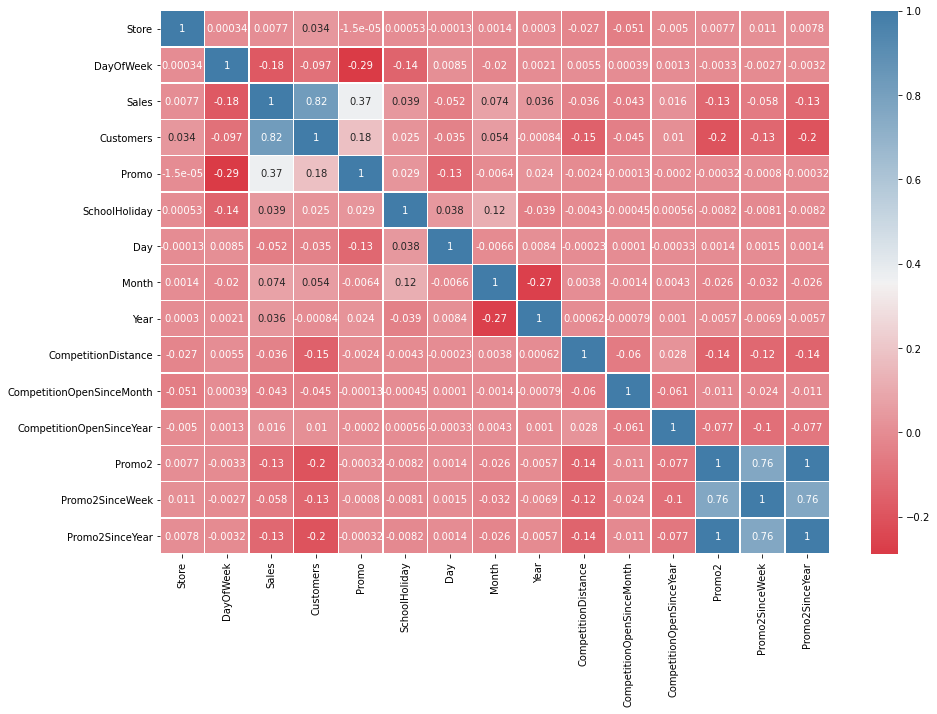

In [54]:
# Matrica medjusobne povezanosti to jest korelacije atributa
# Plava boja oznacava da je korelacija izmedju atributa veca

f, ax = plt.subplots(figsize = (15 ,10))
sns.heatmap(df_train_store.corr(), ax = ax, annot=True, cmap=sns.diverging_palette(10, 240, as_cmap=True), linewidths=0.5)

In [55]:
# Atributi Promo2SinceWeek i Promo2SinceYear su u velikoj korelaciji sa atributom Promo2 pa ih zbog toga uklanjamo iz data seta

df_train_store = df_train_store.drop(["Promo2SinceYear", "Promo2SinceWeek"], axis = 1)
df_test_store = df_test_store.drop(["Promo2SinceYear", "Promo2SinceWeek"], axis = 1)

## Pretvaranje kategorickih atributa

In [56]:
# Informacije o podacima

df_train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Sales                      844338 non-null  int64  
 3   Customers                  844338 non-null  int64  
 4   Promo                      844338 non-null  int64  
 5   StateHoliday               844338 non-null  object 
 6   SchoolHoliday              844338 non-null  int64  
 7   Day                        844338 non-null  int64  
 8   Month                      844338 non-null  int64  
 9   Year                       844338 non-null  int64  
 10  StoreType                  844338 non-null  object 
 11  Assortment                 844338 non-null  object 
 12  CompetitionDistance        844338 non-null  float64
 13  CompetitionOpenSinceMonth  5

In [57]:
# Kolone koje su tipa object pretvaramo u numericke u train set-u 
# Od starog atributa napravice se novi atributi i njih ce biti onoliko koliko ima mogucih vrednosti starog atributa
# Novi atributi ce biti binarnog tipa - 1 i 0.

df_train_store_dummies = pd.get_dummies(df_train_store, columns=['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'])

In [58]:
df_train_store_dummies.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,Day,Month,Year,CompetitionDistance,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,5263,555,1,1,31,7,2015,1270.0,...,0,1,0,1,0,0,1,0,0,0
1,2,5,6064,625,1,1,31,7,2015,570.0,...,0,0,0,1,0,0,0,0,1,0
2,3,5,8314,821,1,1,31,7,2015,14130.0,...,0,0,0,1,0,0,0,0,1,0
3,4,5,13995,1498,1,1,31,7,2015,620.0,...,0,1,0,0,0,1,1,0,0,0
4,5,5,4822,559,1,1,31,7,2015,29910.0,...,0,0,0,1,0,0,1,0,0,0


In [59]:
# Isti postupak se ponavlja sa test setom

df_test_store_dummies = pd.get_dummies(df_test_store, columns=['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'])

In [60]:
df_test_store_dummies.head()

,Id,Store,DayOfWeek,Promo,SchoolHoliday,Day,Month,Year,CompetitionDistance,CompetitionOpenSinceMonth,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,1,4,1,0,17,9,2015,1270.0,9.0,...,0,1,0,1,0,0,1,0,0,0
1,2,3,4,1,0,17,9,2015,14130.0,12.0,...,0,0,0,1,0,0,0,0,1,0
2,3,7,4,1,0,17,9,2015,24000.0,4.0,...,0,0,0,0,0,1,1,0,0,0
3,4,8,4,1,0,17,9,2015,7520.0,10.0,...,0,0,0,1,0,0,1,0,0,0
4,5,9,4,1,0,17,9,2015,2030.0,8.0,...,0,0,0,0,0,1,1,0,0,0


## Izlazni atribut - Sales

<AxesSubplot:title={'center':'Sales Histogram'}, ylabel='Frequency'>

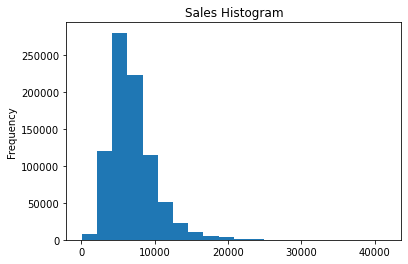

In [61]:
# Provera raspodele izlaznog atributa Sales

df_train_store_dummies['Sales'].plot(kind = "hist", title = "Sales Histogram", bins = 20)

In [62]:
# Uvidjamo da je raspodela pomerena u levo, zbog toga je potrebno logaritmovati ovaj atribut
# Nakon toga, podaci ce biti podeljeni na X i y, gde y uzima samo izlazni atribut Sales, a X sve kolone osim Sales i Customers 
# (ovaj atribut ne postoji u test setu)

X=df_train_store_dummies.drop(['Sales','Customers'], 1)
y=np.log1p(df_train_store_dummies['Sales'])

<AxesSubplot:title={'center':'Sales Histogram'}, ylabel='Frequency'>

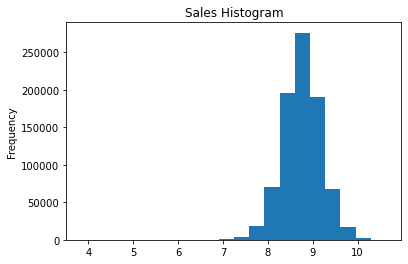

In [63]:
# Prikaz histograma logaritmovane kolone Sales

y.plot(kind = "hist", title = "Sales Histogram", bins = 20)

In [64]:
# Podela na train i test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Evaluacija
## Mera evaluacije : RMSPE - Root Mean Square Percentage Error 
## (Koren srednje kvadratne procentualne greške)

<img src='img/RMSPE.png' width=280>


In [65]:
# RMSPE je bolja mera evaluacije od RMSE buduci da je izrazen procentualno to jest u samoj formuli imamo deljenje sa 
# stvarnom vrednoscu sto doprinosi mnogo boljoj evaluaciji modela jer ako imamo na primer da je tacna vrednost bila 100 000
# a greska je 1000 to je onda mala greska, a ako je tacna vrednost bila 1100, a greska je 1000 to je velika greska i onda
# uz pomoc RMSPE-a mi zapravo trazimo udeo u stvarnoj vrednosti odnosnu tu procentualnu gresku. 
# Potrebno je da vrednost RMSP-a bude sto manja.

def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def rmspe(y, yhat):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y - yhat)**2))
    return rmspe

In [66]:
def print_errors(y_tr, y_te, y_pred_tr, y_pred_te):
    print('RMSPE (Train):', rmspe(y_tr, y_pred_tr))
    print('RMSPE (Test):', rmspe(y_te, y_pred_te))

## Linear Regression

In [67]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [68]:
model_lr = LinearRegression()

In [69]:
model_lr.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
y_pred_lr_train = model_lr.predict(X_train)

In [ ]:
y_pred_lr_test = model_lr.predict(X_test)

## PROBA

In [ ]:
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def rmspe_score(y, yhat):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y - yhat)**2))
    return rmspe

In [251]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
rmspe = make_scorer(rmspe_score, greater_is_better=False)

In [254]:
def error_stats(cv_dict):
    stats = {}
    for k,v in cv_dict.items(): 
        stats.update({k:(v.mean(), v.std())})
    return(stats)

error_stats(cv_dict)

{'fit_time': (0.5597068786621093, 0.026883099305451803),
 'score_time': (0.029126977920532225, 0.003240839587992137),
 'test_RMSPE': (-0.0432720139921502, 0.00015948204163773668)}

In [258]:
# probati ostale mere
# koristiti cross validaciju
# ne trebaju nam predikcije y_pred_lr_test i y_pred_lr_train
cv_dict = cross_validate(model_lr, X_train, y_train, cv = 5, scoring={'RMSPE':rmspe}, return_train_score=True)
error_stats(cv_dict)

{'fit_time': (0.5503288269042969, 0.019395172634484863),
 'score_time': (0.03052692413330078, 0.0038078572653155486),
 'test_RMSPE': (-0.0432720139921502, 0.00015948204163773668),
 'train_RMSPE': (-0.04326981618043779, 3.940592914015463e-05)}

# proba optimizacija parametara

In [ ]:
# nema ioptimizacije paramatera

In [221]:
print("Realna vrednost:")
print_errors(y_train, y_test, np.exp(y_pred_lr_train)-1, np.exp(y_pred_lr_test)-1) # realne vrednosti

print("\nProcentalna vrednost:")
print_errors(y_train, y_test, y_pred_lr_train, y_pred_lr_test) # logaritmovane vrednosti

Realna vrednost:
RMSPE (Train): 752.7273812748853
RMSPE (Test): 752.8715873108105

Procentalna vrednost:
RMSPE (Train): 0.04327009043690369
RMSPE (Test): 0.04320947165115374


In [222]:
# Koeficijenti su rezultat ucenja modela.
# Vece vrednosti koeficijenata znaci da oni vise uticu na izlazni atribut, 
# dok oni koji imaju male vrednosti imaju mali uticaj, atributi koji imaju vrednost 0 ne uticu na izlazni atribut.

model_lr.coef_

array([ 3.40205934e-07, -2.16758593e-02,  3.23993193e-01,  1.52109613e-02,
       -5.13551107e-04,  1.03138715e-02,  3.20509265e-02, -3.40526178e-06,
       -4.20985737e-03, -1.17672788e-04, -5.06218265e-02,  6.60317958e-02,
       -3.73859226e-02, -6.17309455e-02,  3.30850723e-02, -1.40313370e-01,
        4.01655044e-01, -1.30116136e-01, -1.31225538e-01,  4.31789295e-02,
       -2.07467137e-01,  1.64288207e-01,  5.06218265e-02, -9.75550847e-03,
        2.72486569e-02, -6.81149750e-02])

<AxesSubplot:ylabel='att'>

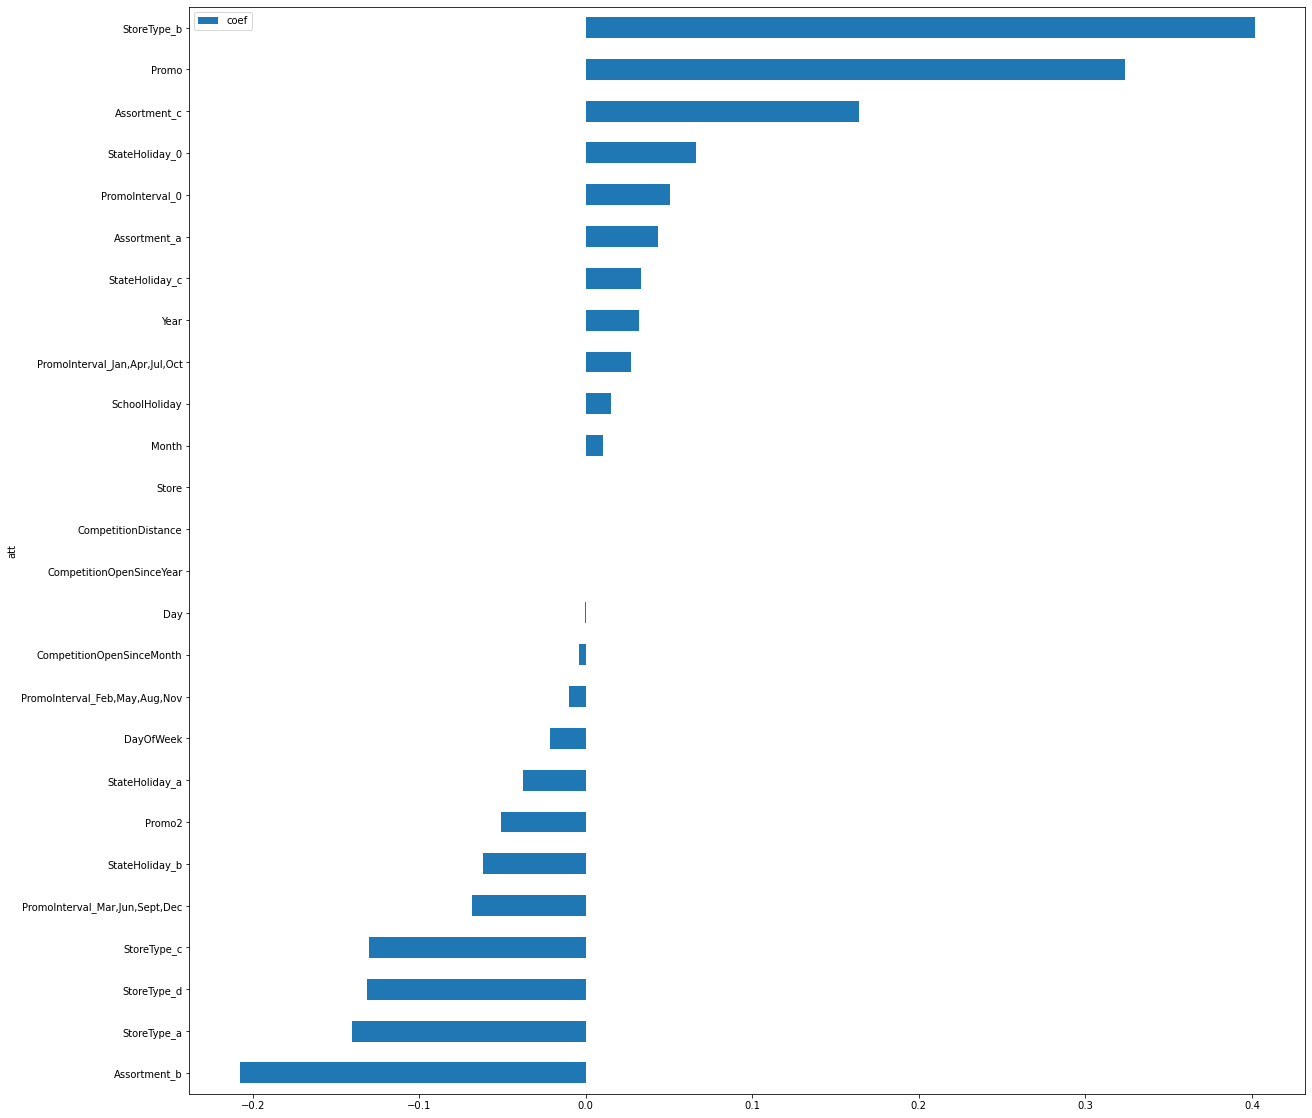

In [223]:
# Vizualizacija koeficijenata

coefs_linear = pd.DataFrame({'att':X.columns, 'coef':model_lr.coef_}).sort_values(by='coef',ascending=True).replace(0,np.nan).dropna()
coefs_linear.replace(0,np.nan).dropna().plot.barh(x='att', y='coef', figsize=(20, 20))

In [224]:
# Vece vrednosti koeficijenata znaci da oni vise uticu na izlazni atribut, 
# dok oni koji imaju male vrednosti imaju mali uticaj, atributi koji imaju vrednost 0 ne uticu na izlazni atribut
# Zbog toga biramo atribute koji imaju velike vrednosti to jest koji su sto dalji od nule

X_train_lr = X_train[['StoreType_b', 'Promo', 'Assortment_c', 'StateHoliday_0', 'PromoInterval_0','Assortment_a', 'StateHoliday_c', 'Year', 'PromoInterval_Jan,Apr,Jul,Oct', 'Assortment_b', 'StoreType_a', 'StoreType_d','StoreType_c','PromoInterval_Mar,Jun,Sept,Dec', 'StateHoliday_a', 'Promo2', 'StateHoliday_b', 'DayOfWeek']]

In [225]:
model_lr_2 = LinearRegression()

In [226]:
model_lr_2.fit(X_train_lr, y_train)

LinearRegression()

In [227]:
X_test_lr = X_test[['StoreType_b', 'Promo', 'Assortment_c', 'StateHoliday_0', 'PromoInterval_0','Assortment_a', 'StateHoliday_c', 'Year', 'PromoInterval_Jan,Apr,Jul,Oct', 'Assortment_b', 'StoreType_a', 'StoreType_d','StoreType_c','PromoInterval_Mar,Jun,Sept,Dec', 'StateHoliday_a', 'Promo2', 'StateHoliday_b', 'DayOfWeek']]

In [228]:
y_pred_lr2_train = model_lr_2.predict(X_train_lr)
y_pred_lr2_test = model_lr_2.predict(X_test_lr)

In [229]:
print("Realna vrednost:")
print_errors(y_train, y_test, np.exp(y_pred_lr2_train)-1, np.exp(y_pred_lr2_test)-1)

print("\nProcentalna vrednost:")
print_errors(y_train, y_test, y_pred_lr2_train, y_pred_lr2_test)

Realna vrednost:
RMSPE (Train): 751.7156139432298
RMSPE (Test): 751.8745423138245

Procentalna vrednost:
RMSPE (Train): 0.04357084412224941
RMSPE (Test): 0.043489104314609894


## proba!

In [230]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [237]:
Ridge_LR  = Ridge(normalize= True, alpha = 3) # alpha = lambda
Lasso_LR = Lasso(normalize= True, alpha = 5)

In [238]:
Lasso_LR.fit(X_train, y_train)

Lasso(alpha=5, normalize=True)

In [239]:
y_pred_lr_train = Lasso_LR.predict(X_train)

In [240]:
y_pred_lr_test = Lasso_LR.predict(X_test)

In [241]:
print("Realna vrednost:")
print_errors(y_train, y_test, np.exp(y_pred_lr_train)-1, np.exp(y_pred_lr_test)-1) # realne vrednosti

print("\nProcentalna vrednost:")
print_errors(y_train, y_test, y_pred_lr_train, y_pred_lr_test) # logaritmovane vrednosti

Realna vrednost:
RMSPE (Train): 728.0824169268918
RMSPE (Test): 728.2331884291139

Procentalna vrednost:
RMSPE (Train): 0.04953548101789771
RMSPE (Test): 0.04938085426142559


## Decision tree

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [71]:
model_dt = DecisionTreeRegressor()

In [72]:
model_dt.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [73]:
y_pred_dt_train = model_dt.predict(X_train)

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
y_pred_dt_test = model_dt.predict(X_test)

In [ ]:
print("Realna vrednost:")
print_errors(y_train, y_test, np.exp(y_pred_dt_train)-1, np.exp(y_pred_dt_test)-1)

print("\nProcentalna vrednost:")
print_errors(y_train, y_test, y_pred_dt_train, y_pred_dt_test)

In [98]:
# Optimizacija parametara algoritma
# max_features = maksimalan broj atributa koji se uzimaju u obzir prilikom grananja; 
# min_samples_leaf = minimalan broj slucajeva da bi cvor postao list; 
# max_depth = maksimalna dubina stabla

decision_tree_params = {'max_features': [1, 2, 4], 'min_samples_leaf': [3, 5, 7],'max_depth': [5, 10, 15]}
grid_dt = GridSearchCV(DecisionTreeRegressor(), decision_tree_params, cv=10, scoring = 'neg_root_mean_squared_error')
grid_dt.fit(X,y)

print('Best param: ', grid_dt.best_params_)

Best param:  {'max_depth': 15, 'max_features': 4, 'min_samples_leaf': 3}


## proba nova optimizacija

In [280]:
decision_tree_params = {'max_features': [1, 2, 4], 'min_samples_leaf': [3, 5, 7],'max_depth': [5, 10, 15], 'min_samples_split': [4, 6, 8]}
grid_dt = GridSearchCV(DecisionTreeRegressor(), decision_tree_params, cv=10, scoring = 'neg_root_mean_squared_error')
grid_dt.fit(X,y)

print('Best param: ', grid_dt.best_params_)

Best param:  {'max_depth': 15, 'max_features': 4, 'min_samples_leaf': 5, 'min_samples_split': 6}


In [298]:
# Optimizovan model

model_dt = DecisionTreeRegressor(max_depth=15, max_features=4, min_samples_leaf=5, criterion = "gini")

In [299]:
model_dt.fit(X_train, y_train)

KeyError: 'gini'

In [284]:
y_pred_dt_train = model_dt.predict(X_train)

AttributeError: 'DecisionTreeRegressor' object has no attribute 'tree_'

In [102]:
y_pred_dt_test = model_dt.predict(X_test)

In [103]:
print("Realna vrednost:")
print_errors(y_train, y_test, np.exp(y_pred_dt_train)-1, np.exp(y_pred_dt_test)-1)

print("\nProcentalna vrednost:")
print_errors(y_train, y_test, y_pred_dt_train, y_pred_dt_test)

Realna vrednost:
RMSPE (Train): 786.7755391370877
RMSPE (Test): 786.1430544332294

Procentalna vrednost:
RMSPE (Train): 0.03427368128316955
RMSPE (Test): 0.034822496150572854


In [104]:
# Selekcija atributa

feat_importance_tree = model_dt.tree_.compute_feature_importances()
print("feat importance = " + str(feat_importance_tree))

feat importance = [8.22765253e-02 9.82299995e-02 2.79927311e-01 3.02558822e-03
 3.02972030e-02 3.22119313e-02 8.64937170e-03 1.34478687e-01
 7.27068912e-02 8.54608239e-02 2.49440168e-02 1.82025410e-04
 5.32501064e-04 1.53657583e-04 5.57693772e-05 3.20120289e-02
 1.87961167e-02 9.72973828e-03 9.71503226e-03 2.48222637e-02
 1.46273575e-03 2.98315750e-02 1.03873019e-03 5.64341530e-03
 5.33027988e-03 8.48578097e-03]


<AxesSubplot:ylabel='att'>

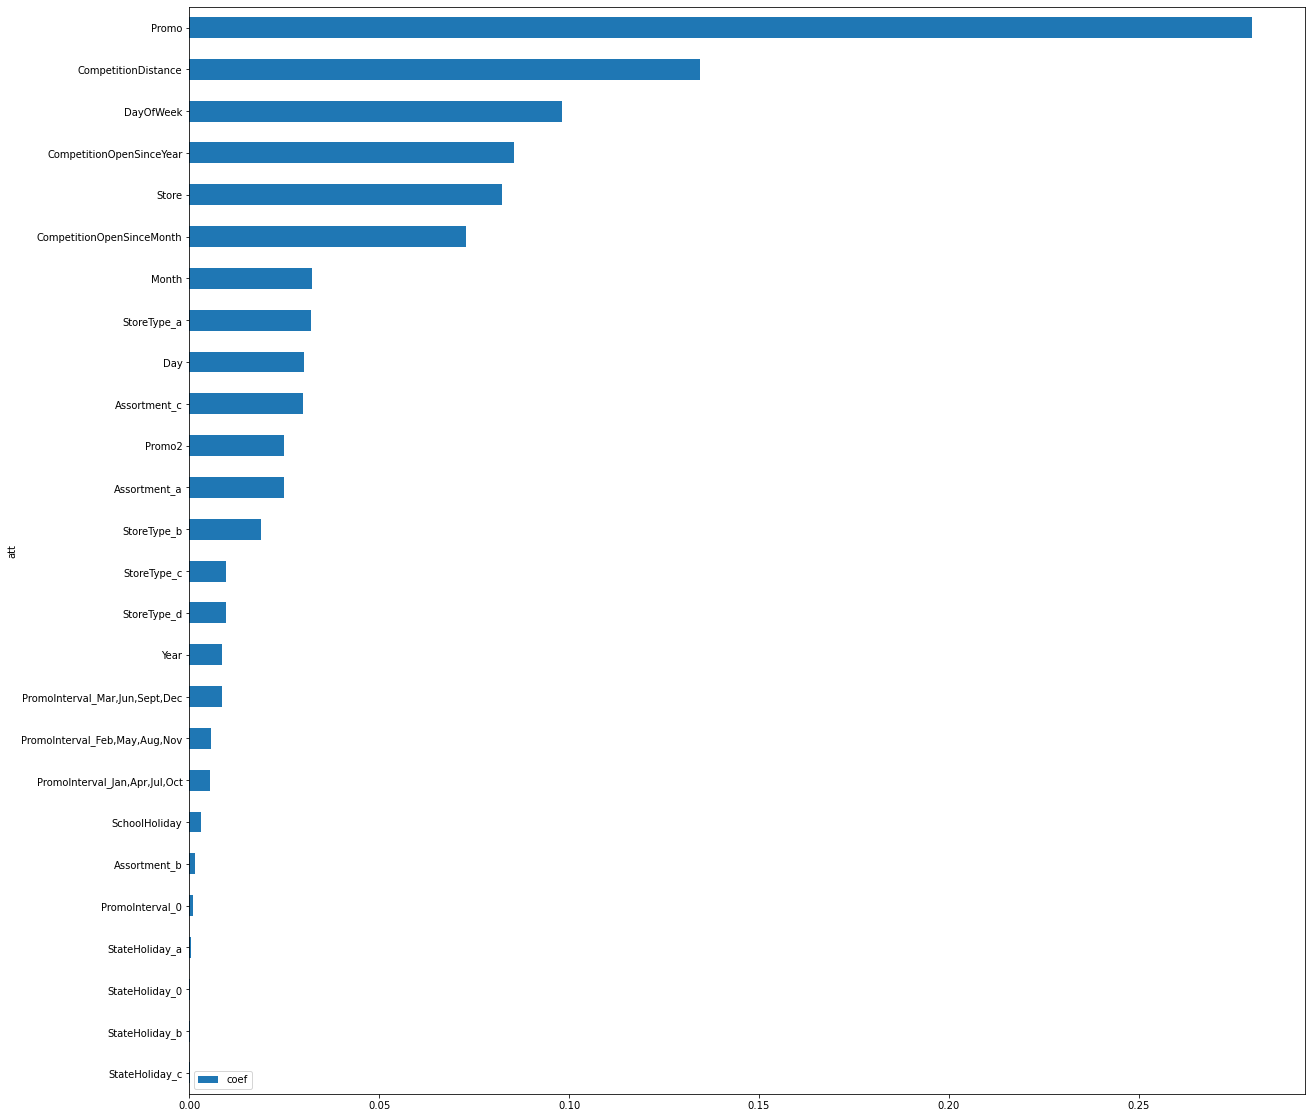

In [105]:
coefs_tree = pd.DataFrame({'att':X.columns, 'coef':model_dt.feature_importances_}).sort_values(by='coef',ascending=True).replace(0,np.nan).dropna()
coefs_tree.plot.barh(x='att', y='coef', figsize=(20, 20))

In [106]:
# Train data set sa selektovanim atributima

X_train_dt = X_train[['Promo', 'CompetitionDistance', 'Assortment_a', 'DayOfWeek', 'CompetitionOpenSinceYear', 'Store', 'StoreType_b', 'CompetitionOpenSinceMonth', 'PromoInterval_0']]

In [107]:
# Novi model sa selektovanim atributima

model_dt_2 = DecisionTreeRegressor(max_depth=15, max_features=4, min_samples_leaf=5)

In [108]:
model_dt_2.fit(X_train_dt, y_train)

DecisionTreeRegressor(max_depth=15, max_features=4, min_samples_leaf=5)

In [109]:
X_test_dt = X_test[['Promo', 'CompetitionDistance', 'Assortment_a', 'DayOfWeek', 'CompetitionOpenSinceYear', 'Store', 'StoreType_b', 'CompetitionOpenSinceMonth', 'PromoInterval_0']]

In [110]:
y_pred_dt2_train = model_dt_2.predict(X_train_dt)

In [111]:
y_pred_dt2_test = model_dt_2.predict(X_test_dt)

In [112]:
print("Realna vrednost:")
print_errors(y_train, y_test, np.exp(y_pred_dt2_train)-1, np.exp(y_pred_dt2_test)-1)

print("\nProcentalna vrednost:")
print_errors(y_train, y_test, y_pred_dt2_train, y_pred_dt2_test)

Realna vrednost:
RMSPE (Train): 797.1658341812648
RMSPE (Test): 795.4726135302012

Procentalna vrednost:
RMSPE (Train): 0.029656176820285738
RMSPE (Test): 0.02967658548009376


## KNN

In [118]:
from sklearn.neighbors import KNeighborsRegressor

In [119]:
model_knn = KNeighborsRegressor()

In [120]:
model_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [121]:
y_pred_knn_train = model_knn.predict(X_train)

In [122]:
y_pred_knn_test = model_knn.predict(X_test)

In [123]:
print("Realna vrednost:")
print_errors(y_train, y_test, np.exp(y_pred_knn_train)-1, np.exp(y_pred_knn_test)-1)

print("\nProcentalna vrednost:")
print_errors(y_train, y_test, y_pred_knn_train, y_pred_knn_test)

Realna vrednost:
RMSPE (Train): 812.8565808150663
RMSPE (Test): 808.8860989311509

Procentalna vrednost:
RMSPE (Train): 0.019359768083598624
RMSPE (Test): 0.02415739059411452


In [124]:
# Optimizacija parametara algoritma

knn_params = {'n_neighbors': range(3,11)}
grid_knn = GridSearchCV(KNeighborsRegressor(), knn_params, cv=10, scoring = 'neg_root_mean_squared_error')
grid_knn.fit(X,y)

print('Best param: ', grid_knn.best_params_)

Best param:  {'n_neighbors': 6}


In [125]:
model_knn = KNeighborsRegressor(n_neighbors=6)

In [126]:
model_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [127]:
y_pred_knn_train = model_knn.predict(X_train)

In [128]:
y_pred_knn_test = model_knn.predict(X_test)

In [129]:
print("Realna vrednost:")
print_errors(y_train, y_test, np.exp(y_pred_knn_train)-1, np.exp(y_pred_knn_test)-1)

print("\nProcentalna vrednost:")
print_errors(y_train, y_test, y_pred_knn_train, y_pred_knn_test)

Realna vrednost:
RMSPE (Train): 810.0897646905232
RMSPE (Test): 806.7006983026357

Procentalna vrednost:
RMSPE (Train): 0.020238977026873113
RMSPE (Test): 0.024272906542545977


In [130]:
knn_params= {
    'n_neighbors' : [3, 5, 11, 19],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

gs = GridSearchCV (
     KNeighborsRegressor(),
     knn_params,
     verbose = 1,
     cv = 3,
     n_jobs = -1
)

model_knn_2 = gs.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  8.2min finished


In [131]:
model_knn_2.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [132]:
y_pred_knn2_train = model_knn_2.predict(X_train)

In [133]:
y_pred_knn2_test = model_knn_2.predict(X_test)

In [134]:
print("Realna vrednost:")
print_errors(y_train, y_test, np.exp(y_pred_knn2_train)-1, np.exp(y_pred_knn2_test)-1)

print("\nProcentalna vrednost:")
print_errors(y_train, y_test, y_pred_knn2_train, y_pred_knn2_test)

Realna vrednost:
RMSPE (Train): 837.4121630504216
RMSPE (Test): 810.5419361978795

Procentalna vrednost:
RMSPE (Train): 0.0
RMSPE (Test): 0.020275194435255123


## Random Forest

In [141]:
from sklearn.ensemble import RandomForestRegressor

In [142]:
model_rf = RandomForestRegressor()

In [143]:
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [144]:
y_pred_rf_train = model_rf.predict(X_train)

In [145]:
y_pred_rf_test = model_rf.predict(X_test)

In [146]:
print("Realna vrednost:")
print_errors(y_train, y_test, np.exp(y_pred_rf_train)-1, np.exp(y_pred_rf_test)-1)

print("\nProcentalna vrednost:")
print_errors(y_train, y_test, y_pred_rf_train, y_pred_rf_test)

Realna vrednost:
RMSPE (Train): 830.0524563580431
RMSPE (Test): 823.3224965579099

Procentalna vrednost:
RMSPE (Train): 0.005381387100475257
RMSPE (Test): 0.014291682934531879


In [147]:
# Optimizacija parametara algoritma
# n_estimators = broj stabala

random_forest_params = {'n_estimators': [20, 25, 30]}
grid_rf = GridSearchCV(RandomForestRegressor(), random_forest_params, cv=5, scoring='neg_root_mean_squared_error')
grid_rf.fit(X,y)
print('Best param: ', grid_rf.best_params_)

Best param:  {'n_estimators': 30}


In [148]:
# Optimizovan model

model_rf = RandomForestRegressor(n_estimators = 30)

In [149]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

In [150]:
y_pred_rf_train = model_rf.predict(X_train)

In [151]:
y_pred_rf_test = model_rf.predict(X_test)

In [152]:
print("Realna vrednost:")
print_errors(y_train, y_test, np.exp(y_pred_rf_train)-1, np.exp(y_pred_rf_test)-1)

print("\nProcentalna vrednost:")
print_errors(y_train, y_test, y_pred_rf_train, y_pred_rf_test)

Realna vrednost:
RMSPE (Train): 830.1929213310317
RMSPE (Test): 823.5546172119936

Procentalna vrednost:
RMSPE (Train): 0.005655197921595682
RMSPE (Test): 0.014499642340465661


In [153]:
model_rf.feature_importances_

array([1.40147240e-01, 6.90190049e-02, 1.63956588e-01, 5.35059398e-03,
       5.19580245e-02, 4.68660209e-02, 1.76693499e-02, 2.07968568e-01,
       8.55712107e-02, 9.91239686e-02, 1.41430151e-02, 1.25429978e-03,
       2.36102573e-04, 2.36795982e-05, 2.75558019e-05, 1.72274244e-02,
       1.56073142e-02, 1.01997074e-02, 1.03283194e-02, 1.79383875e-02,
       6.57608197e-04, 4.45232672e-03, 3.71424384e-03, 4.33242493e-03,
       4.05555669e-03, 8.17146331e-03])

<AxesSubplot:ylabel='att'>

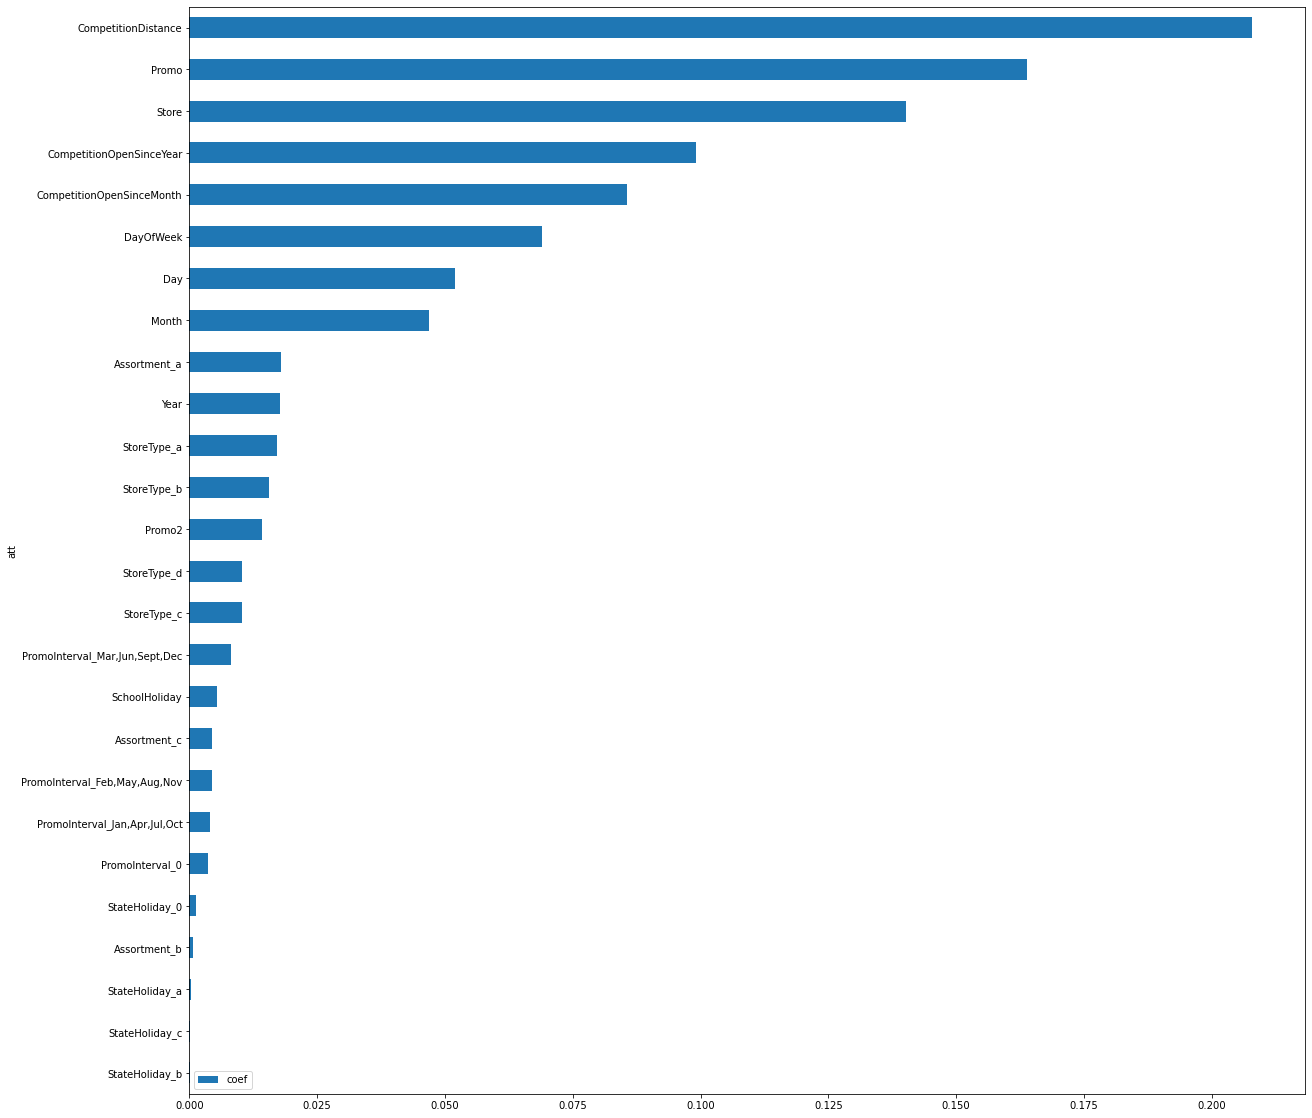

In [154]:
coefs_rf = pd.DataFrame({'att':X.columns, 'coef':model_rf.feature_importances_}).sort_values(by='coef',ascending=True).replace(0,np.nan).dropna()
coefs_rf.plot.barh(x='att', y='coef', figsize=(20, 20))

In [155]:
X_train_rf = X_train[['CompetitionDistance', 'Promo', 'Store', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'DayOfWeek', 'Day', 'Month', 'Year', 'StoreType_a', 'Assortment_a', 'StoreType_b']]

In [156]:
model_rf_2 = RandomForestRegressor(n_estimators = 30)

In [157]:
model_rf_2.fit(X_train_rf, y_train)

RandomForestRegressor(n_estimators=30)

In [158]:
X_test_rf = X_test[['CompetitionDistance', 'Promo', 'Store', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'DayOfWeek', 'Day', 'Month', 'Year', 'StoreType_a', 'Assortment_a', 'StoreType_b']]

In [159]:
y_pred_rf2_train = model_rf_2.predict(X_train_rf)

In [160]:
y_pred_rf2_test = model_rf_2.predict(X_test_rf)

In [161]:
print("Realna vrednost:")
print_errors(y_train, y_test, np.exp(y_pred_rf2_train)-1, np.exp(y_pred_rf2_test)-1)

print("\nProcentalna vrednost:")
print_errors(y_train, y_test, y_pred_rf2_train, y_pred_rf2_test)

Realna vrednost:
RMSPE (Train): 829.3117478546537
RMSPE (Test): 821.9437634361465

Procentalna vrednost:
RMSPE (Train): 0.005940871518695329
RMSPE (Test): 0.015070643579641222


## XGBoost

In [162]:
!pip install xgboost

  Using cached xgboost-1.4.1-py3-none-win_amd64.whl (97.8 MB)


In [203]:
import xgboost as xgb

In [204]:
model_xgb = xgb.XGBRegressor()

In [205]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [206]:
y_pred_xgb_train = model_xgb.predict(X_train)

In [207]:
y_pred_xgb_test = model_xgb.predict(X_test)

In [208]:
print("Realna vrednost:")
print_errors(y_train, y_test, np.exp(y_pred_xgb_train)-1, np.exp(y_pred_xgb_test)-1)

print("\nProcentalna vrednost:")
print_errors(y_train, y_test, y_pred_xgb_train, y_pred_xgb_test)

Realna vrednost:
RMSPE (Train): 809.1764547566504
RMSPE (Test): 807.7492891842866

Procentalna vrednost:
RMSPE (Train): 0.01785556377050872
RMSPE (Test): 0.017812849503496393


In [77]:
# Optimizacija parametara
 
# min_split_loss = parametar koji sprecava overfitting; 
# max_depth = maksimalna dubina
# learning_rate = znacajnost smanjenja greske svake iteracije;

xgb_params = {'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30], 'min_split_loss': [0.0, 0.1, 0.2 , 0.3, 0.4], 'max_depth': [4, 6, 8, 10, 12]}
grid_xgb = GridSearchCV(xgb.XGBRegressor(), xgb_params, cv=5, scoring='neg_root_mean_squared_error')
grid_xgb.fit(X,y)
print('Best param: ', grid_xgb.best_params_)

KeyboardInterrupt: 

In [209]:
model_xgb = xgb.XGBRegressor(learning_rate = 0.1, min_split_loss = 0.1, max_depth = 10)

In [210]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.100000001,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, min_split_loss=0.1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [211]:
y_pred_xgb_train = model_xgb.predict(X_train)

In [212]:
y_pred_xgb_test = model_xgb.predict(X_test)

In [213]:
print("Realna vrednost:")
print_errors(y_train, y_test, np.exp(y_pred_xgb_train)-1, np.exp(y_pred_xgb_test)-1)

print("\nProcentalna vrednost:")
print_errors(y_train, y_test, y_pred_xgb_train, y_pred_xgb_test)

Realna vrednost:
RMSPE (Train): 804.4755743221585
RMSPE (Test): 802.1826116972675

Procentalna vrednost:
RMSPE (Train): 0.016588057466464065
RMSPE (Test): 0.0168806399947866


In [214]:
model_xgb.feature_importances_

array([0.03872637, 0.02252656, 0.233311  , 0.00914325, 0.02396898,
       0.01689182, 0.00686537, 0.05040087, 0.04462585, 0.04747954,
       0.07119693, 0.01011016, 0.00375945, 0.00325789, 0.00227366,
       0.05744628, 0.0869842 , 0.03285516, 0.04668083, 0.07156749,
       0.0045605 , 0.01533559, 0.        , 0.02612473, 0.02830127,
       0.04560626], dtype=float32)

<AxesSubplot:ylabel='att'>

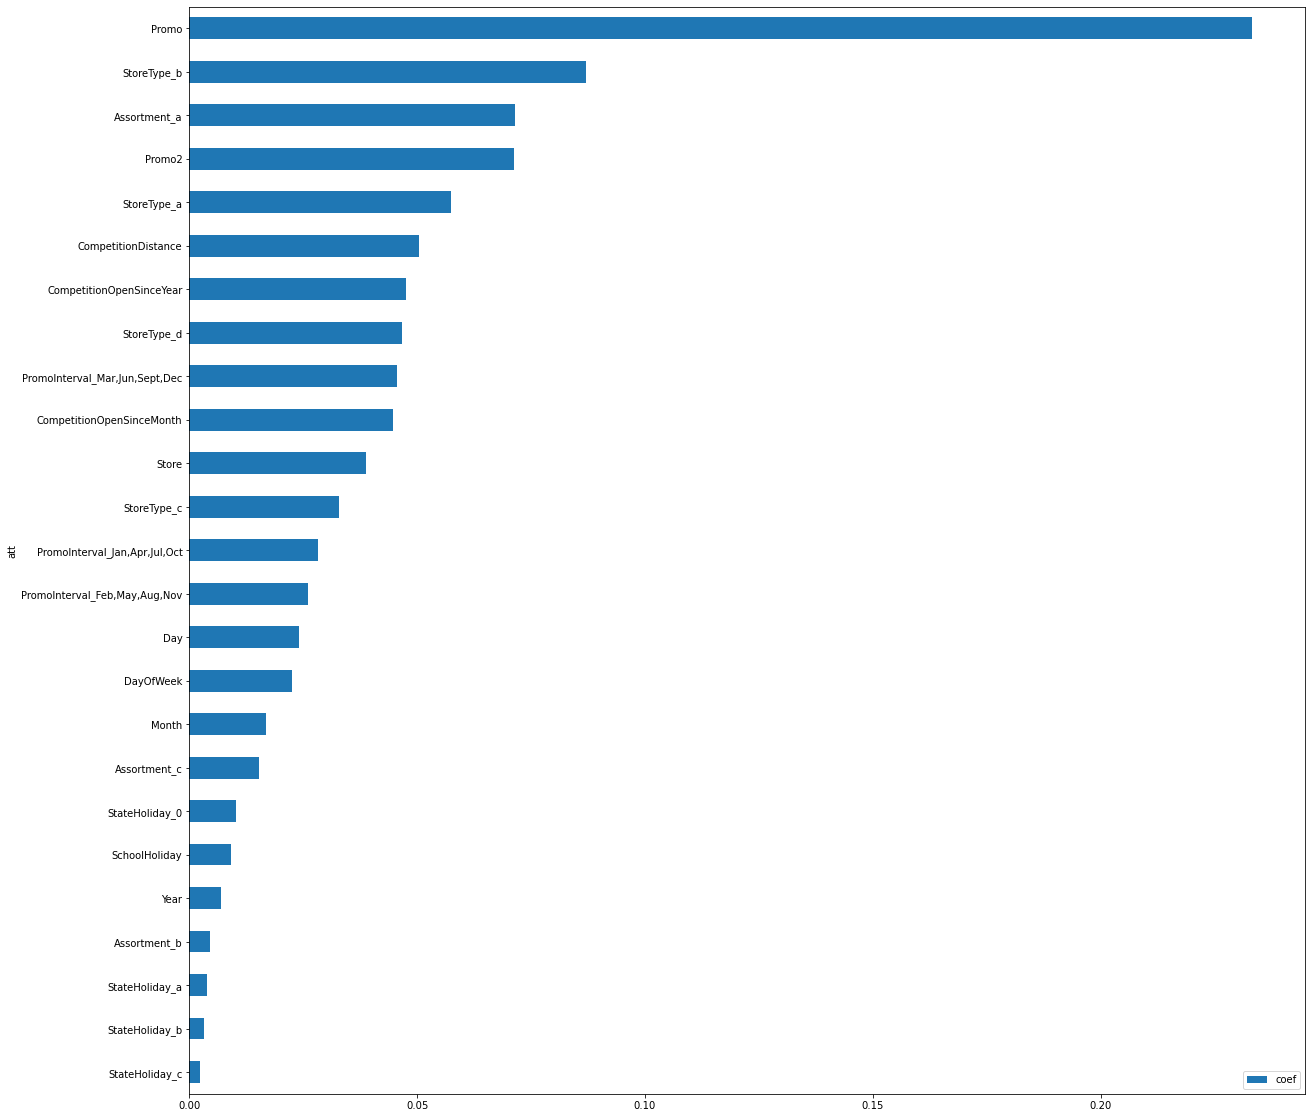

In [215]:
coefs_xgb = pd.DataFrame({'att':X.columns, 'coef':model_xgb.feature_importances_}).sort_values(by='coef',ascending=True).replace(0,np.nan).dropna()
coefs_xgb.plot.barh(x='att',y='coef', figsize=(20, 20))

In [307]:
X_train_xgb = X_train[['Store', 'DayOfWeek', 'Promo', 'Day', 'Month',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'StateHoliday_0',
       'StoreType_a','StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
        'Assortment_c', 'PromoInterval_0',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'Year']]

In [308]:
X_train.columns

Index(['Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'Day', 'Month', 'Year',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
       'Assortment_b', 'Assortment_c', 'PromoInterval_0',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [309]:
model_xgb_2 = xgb.XGBRegressor(learning_rate = 0.1, min_split_loss = 0.1, max_depth = 10)

In [310]:
model_xgb_2.fit(X_train_xgb, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.100000001,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, min_split_loss=0.1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [311]:
X_test_xgb = X_test[['Store', 'DayOfWeek', 'Promo', 'Day', 'Month',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'StateHoliday_0',
       'StoreType_a','StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
        'Assortment_c', 'PromoInterval_0',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'Year']]

In [312]:
y_pred_xgb2_train = model_xgb_2.predict(X_train_xgb)

In [313]:
y_pred_xgb2_test = model_xgb_2.predict(X_test_xgb)

In [314]:
print("Realna vrednost:")
print_errors(y_train, y_test, np.exp(y_pred_xgb2_train)-1, np.exp(y_pred_xgb2_test)-1)

print("\nProcentalna vrednost:")
print_errors(y_train, y_test, y_pred_xgb2_train, y_pred_xgb2_test)

Realna vrednost:
RMSPE (Train): 805.3261117401148
RMSPE (Test): 803.2335358772376

Procentalna vrednost:
RMSPE (Train): 0.01621531116898604
RMSPE (Test): 0.016499985614113605


## Poredjenje performansi algoritama

In [114]:
print('REDUCED LINEAR REGRESSION\n')
print_errors(y_train, y_test, y_pred_lr2_train, y_pred_lr2_test)

REDUCED LINEAR REGRESSION

RMSPE (Train): 0.04357084412224941
RMSPE (Test): 0.043489104314609894


In [115]:
print('DECISION TREE\n')
print_errors(y_train, y_test, y_pred_dt_train, y_pred_dt_test)

DECISION TREE

RMSPE (Train): 0.03427368128316955
RMSPE (Test): 0.034822496150572854


In [116]:
print('REDUCED DECISION TREE\n')
print_errors(y_train, y_test, y_pred_dt2_train, y_pred_dt2_test)

REDUCED DECISION TREE

RMSPE (Train): 0.029656176820285738
RMSPE (Test): 0.02967658548009376


In [170]:
# print('REDUCED KNN\n')
# print_errors(y_train, y_test, y_pred_knn_train, y_pred_knn_test)

KNN

RMSPE (Train): 0.020238977026873113
RMSPE (Test): 0.024272906542545977


In [153]:
print('REDUCED KNN\n')
print_errors(y_train, y_test, y_pred_knn2_train, y_pred_knn2_test)

REDUCED KNN

RMSPE (Train): 0.0
RMSPE (Test): 0.020275194435255123


In [160]:
print('RANDOM FOREST\n')
print_errors(y_train, y_test, y_pred_rf_train, y_pred_rf_test)

RANDOM FOREST

RMSPE (Train): 0.005687098749990414
RMSPE (Test): 0.01447635514134407


In [161]:
print('REDUCED RANDOM FOREST\n')
print_errors(y_train, y_test, y_pred_rf2_train, y_pred_rf2_test)

REDUCED RANDOM FOREST

RMSPE (Train): 0.005915161384831391
RMSPE (Test): 0.015058565875463684


In [297]:
print('XGBOOST\n')
print_errors(y_train, y_test, y_pred_xgb_train, y_pred_xgb_test)

XGBOOST

RMSPE (Train): 0.016588057466464065
RMSPE (Test): 0.0168806399947866


In [315]:
print('REDUCED XGBOOST\n')
print_errors(y_train, y_test, y_pred_xgb2_train, y_pred_xgb2_test)

REDUCED XGBOOST

RMSPE (Train): 0.01621531116898604
RMSPE (Test): 0.016499985614113605


## Primena modela

In [226]:
df_train_store_dummies.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday',
       'Day', 'Month', 'Year', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c', 'PromoInterval_0',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [227]:
df_test_store_dummies.columns

Index(['Id', 'Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'Day', 'Month',
       'Year', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'StateHoliday_0',
       'StateHoliday_a', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [228]:
# Uklanjanje kolone Id iz Test skupa podataka (jer ne postoji u Train skupu)

df_test_store_dummies.drop(['Id'], axis=1, inplace=True)

In [229]:
# Dodavanje kolona StateHoliday_b i StateHoliday_c koje ne postoje u Test setu, a nalaze se u Train setu

df_test_store_dummies['StateHoliday_b'] = 0
df_test_store_dummies['StateHoliday_c'] = 0

In [230]:
# Eksplicitno zadavanje redosleda kolona

df_test_store_dummies = df_test_store_dummies[['Store', 'DayOfWeek', 'Promo', 'SchoolHoliday',
       'Day', 'Year', 'Month', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c', 'PromoInterval_0',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec']]

In [231]:
df_test_store_dummies.columns

Index(['Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'Day', 'Year', 'Month',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
       'Assortment_b', 'Assortment_c', 'PromoInterval_0',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

## Linear regression

In [273]:
df_test_store_lr2 = df_test_store_dummies[['StoreType_b', 'Promo', 'Assortment_c', 'StateHoliday_0', 'PromoInterval_0','Assortment_a', 'StateHoliday_c', 'Year', 'PromoInterval_Jan,Apr,Jul,Oct', 'Assortment_b', 'StoreType_a', 'StoreType_d','StoreType_c','PromoInterval_Mar,Jun,Sept,Dec', 'StateHoliday_a', 'Promo2', 'StateHoliday_b', 'DayOfWeek']]

In [274]:
pred_lr2_test = model_lr_2.predict(df_test_store_lr2)

In [275]:
pred_lr2_test_exp=np.exp(pred_lr2_test)-1

In [276]:
test_data['Sales'] = pred_lr2_test_exp

In [277]:
results_lr2 = test_data[['Id', 'Sales']]

In [278]:
results_lr2.set_index(results_lr2['Id'], inplace=True)
results_lr2.drop(['Id'], axis = 1, inplace = True)
results_lr2.head()

,Sales
Id,
1,7709.073893
2,7084.695288
3,8505.289382
4,7568.287709
5,8505.289382


In [279]:
results_lr2.to_csv('results_lr2.csv')

In [280]:
test_data.drop(['Sales'], axis=1, inplace=True)

## Decision tree

In [174]:
pred_dt_test = model_dt.predict(df_test_store_dummies)

In [175]:
pred_dt_test_exp=np.exp(pred_dt_test)-1

In [176]:
test_data['Sales'] = pred_dt_test_exp

In [177]:
results_dt = test_data[['Id', 'Sales']]

In [178]:
results_dt.set_index(results_dt['Id'], inplace=True)
results_dt.drop(['Id'], axis = 1, inplace = True)
results_dt.head()

,Sales
Id,
1,8677.721637
2,11458.490737
3,15150.924457
4,9923.686374
5,9013.050929


In [179]:
results_dt.to_csv('results_dt.csv')

In [180]:
test_data.drop(['Sales'], axis=1, inplace=True)

## Decision tree 2

In [181]:
df_test_store_dt2 = df_test_store_dummies[['Promo', 'CompetitionDistance', 'Assortment_a', 'DayOfWeek', 'CompetitionOpenSinceYear', 'Store', 'StoreType_b', 'Month', 'CompetitionOpenSinceMonth']]

In [182]:
pred_dt2_test = model_dt_2.predict(df_test_store_dt2)

In [183]:
pred_dt2_test_exp=np.exp(pred_dt2_test)-1

In [184]:
test_data['Sales'] = pred_dt2_test_exp

In [185]:
results_dt2 = test_data[['Id', 'Sales']]

In [186]:
results_dt2.set_index(results_dt2['Id'], inplace=True)
results_dt2.drop(['Id'], axis = 1, inplace = True)
results_dt2.head()

,Sales
Id,
1,6142.592928
2,8128.797470
3,6853.763767
4,6951.585455
5,7909.677240


In [187]:
results_dt2.to_csv('results_dt2.csv')

In [188]:
test_data.drop(['Sales'], axis=1, inplace=True)

## KNN

In [189]:
pred_knn_test = model_knn_2.predict(df_test_store_dummies)

In [190]:
pred_knn_test_exp=np.exp(pred_knn_test)-1

In [191]:
test_data['Sales'] = pred_knn_test_exp

In [192]:
results_knn = test_data[['Id', 'Sales']]

In [193]:
results_knn.set_index(results_knn['Id'], inplace=True)
results_knn.drop(['Id'], axis = 1, inplace=True)
results_knn.head()

,Sales
Id,
1,7394.130972
2,12218.427313
3,12765.188664
4,8824.193855
5,8970.740067


In [194]:
results_knn.to_csv('results_knn.csv')

In [195]:
test_data.drop(['Sales'], axis=1, inplace=True)

## Random Forest

In [196]:
pred_rf_test = model_rf.predict(df_test_store_dummies)

In [197]:
pred_rf_test_exp=np.exp(pred_rf_test)-1

In [198]:
test_data['Sales'] = pred_rf_test_exp

In [199]:
results_rf = test_data[['Id', 'Sales']]

In [200]:
results_rf.set_index(results_rf['Id'], inplace=True)
results_rf.drop(['Id'], axis = 1, inplace = True)
results_rf.head()

,Sales
Id,
1,7210.643159
2,11394.619703
3,12334.793467
4,8714.858865
5,9048.013761


In [201]:
results_rf.to_csv('results_rf.csv')

In [202]:
test_data.drop(['Sales'], axis = 1, inplace=True)

## Random Forest 2

In [203]:
df_test_store_rf2 = df_test_store_dummies[['CompetitionDistance', 'Promo', 'Store', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'DayOfWeek', 'Day', 'Month', 'Year', 'StoreType_a', 'Assortment_a', 'StoreType_b']]

In [204]:
pred_rf2_test = model_rf_2.predict(df_test_store_rf2)

In [205]:
pred_rf2_test_exp=np.exp(pred_rf2_test)-1

In [206]:
test_data['Sales'] = pred_rf2_test_exp

In [207]:
results_rf2 = test_data[['Id', 'Sales']]

In [208]:
results_rf2.set_index(results_rf2['Id'], inplace=True)
results_rf2.drop(['Id'], axis = 1, inplace = True)
results_rf2.head()

,Sales
Id,
1,4412.477088
2,7459.182757
3,9122.565862
4,7286.982623
5,7174.471003


In [209]:
results_rf2.to_csv('results_rf2.csv')

In [210]:
test_data.drop(['Sales'], axis = 1, inplace=True)

## XGBoost

In [232]:
pred_xgb_test = model_xgb.predict(df_test_store_dummies)

In [233]:
pred_xgb_test_exp=np.exp(pred_xgb_test)-1

In [234]:
test_data['Sales'] = pred_xgb_test_exp

In [235]:
results_xgb = test_data[['Id', 'Sales']]

In [236]:
results_xgb.set_index(results_xgb['Id'], inplace=True)
results_xgb.drop(['Id'], axis = 1, inplace = True)
results_xgb.head()

,Sales
Id,
1,7500.020508
2,11038.463867
3,13181.528320
4,8690.590820
5,8825.536133


In [237]:
results_xgb.to_csv('results_xgb.csv')

In [238]:
test_data.drop(['Sales'], axis = 1, inplace=True)

## XGBoost 2

In [316]:
df_test_store_xgb2 = df_test_store_dummies[['Store', 'DayOfWeek', 'Promo', 'Day', 'Month', 'Year',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'StateHoliday_0',
       'StoreType_a','StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
        'Assortment_c', 'PromoInterval_0',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec']]

In [317]:
pred_xgb2_test = model_xgb_2.predict(df_test_store_xgb2)

In [318]:
pred_xgb2_test_exp=np.exp(pred_xgb2_test)-1

In [319]:
test_data['Sales'] = pred_xgb2_test_exp

In [320]:
results_xgb2 = test_data[['Id', 'Sales']]

In [321]:
results_xgb2.set_index(results_xgb2['Id'], inplace=True)
results_xgb2.drop(['Id'], axis = 1, inplace = True)
results_xgb2.head()

,Sales
Id,
1,6718.903320
2,7183.461426
3,7564.434082
4,7746.037109
5,7564.434082


In [322]:
results_xgb2.to_csv('results_xgb2.csv')

In [323]:
test_data.drop(['Sales'], axis = 1, inplace=True)